# Simulating Kepler exoplanet orbits
Upload some actual data from the Kepler telescope confirmed planets database to simulate the stability of planetary systems.

Start by importing our usual things:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

If we recall we have a lot of columns in this dataset for each planet. We can check them out inline, or just simply open up the text file:

In [1]:
!head -n 40 kepler101data.txt

# columns are:
# (1) Row ID from table
# (2) System Name
# (3) planet letter
# (4) Number of total planets in system
# (5) Orbital period in days
# (6) Upper error in Orbital Period (P_orb +/- (upper error)/(lower error)) in days
# (7) Lower error in orbital period in days
# (8) Semi-major axis  in AU
# (9) Error in semi major axis (a +/- ea)
# (10) Eccentricity
# (11) Upper error in eccentricity
# (12) Lower error in eccentricity
# (13) Inclination in degrees
# (14) Upper error in inclination
# (15) Lower error in inclination
# (16) Planet's mass in Jupiter mass (or M*sin(i) if given)
# (15) Upper error in planet's mass in jupiter masses
# (16) Lower error in planet's mass in jupieter masses
# (17) Mass type ('Mass' or 'Msini' - tells you what is the "mass" you actually measure)
# (18) Star's mass in solar masses
# (19) Error in star's mass
# (20) Star's radius in solar radii
# (21) Upper error in star's radius
# (22) Lower error in star's radius
# (23) Transit time in Julian days sin

Okay dokey, read in the file! Because there are so many parameters, let's use another library to do this for us.

Make sure you've downloaded the kepler 10 and 101 data sets!

In [14]:
from convert_kepler_data import read_kepler_data
kepler_data = read_kepler_data('/Users/jillnaiman1/Downloads/kepler101data.txt')
kepler_data

array([(779., b'Kepler-101 ', b'b', 2., 3.4876812, 7.0e-06, -7.0e-06, 0.0474, 0.009 , 0.086,  8.e-02, -5.9e-02, 85.82, 1.73, -1.53, 0.16,  2.e-02, -1.e-02, b' Mass', 1.17, 0.06, 1.56, 0.2, -0.2, 288.77994, 0.00041, -0.00041),
       (780., b'Kepler-101 ', b'c', 2., 6.02976  , 7.5e-05, -7.5e-05, 0.0684, 0.0014, 0.   , -1.e+02, -1.0e+02, 84.6 , 3.4 , -3.1 , 0.01, -1.e+02, -1.e+02, b' Mass', 1.17, 0.06, 1.56, 0.2, -0.2,  65.486  , 0.0088 , -0.0088 )],
      dtype=[('RowID', '<f4'), ('SysName', 'S12'), ('planetLetter', 'S2'), ('NumberOfPlanets', '<f4'), ('Porb', '<f4'), ('ePorbU', '<f4'), ('ePorbL', '<f4'), ('a', '<f4'), ('ea', '<f4'), ('ecc', '<f4'), ('eeccU', '<f4'), ('eeccL', '<f4'), ('Incl', '<f4'), ('eInclU', '<f4'), ('eInclL', '<f4'), ('pMass', '<f4'), ('epMassU', '<f4'), ('epMassL', '<f4'), ('pMassType', 'S8'), ('sMass', '<f4'), ('esMass', '<f4'), ('sRadius', '<f4'), ('esRadiusU', '<f4'), ('esRadiusL', '<f4'), ('tTime', '<f4'), ('etTimeU', '<f4'), ('etTimeL', '<f4')])

The above are all the different parameters for each planet, as listed by the "head" of the text file.

We can also look at individual parameters that might be interesting:

In [15]:
kepler_data['ecc']

array([0.086, 0.   ], dtype=float32)

So, the first planet has a small eccentricity and the second has zero, so a circular orbit.

Let's use a library to convert this to units that the Hermite solver can use.  Note: this uses a few assumptions to convert the Kepler data into initial conditions for our simulations.

Please check out the library if you want to see these assumptions if you are curious!

In [16]:
from convert_kepler_data import convert_kepler_data

In [17]:
star_mass, \
planet_masses, \
planet_initial_position, \
planet_initial_velocity, ecc = convert_kepler_data(kepler_data)

Let's see how these things look:

In [18]:
star_mass # Msun

1.17

In [19]:
planet_masses # in Jupiter masses

array([0.16, 0.01])

In [20]:
planet_initial_position # in AU

array([[-0.0433236 ,  0.        ,  0.        ],
       [ 0.06702392,  0.01365115,  0.        ]])

In [21]:
planet_initial_velocity # in km/s

array([[   0.        , -141.87933522,    0.        ],
       [ -24.65587511,  121.05448789,    0.        ]])

### Exercise
Use the Hermite solver to model this system & plot the orbits of the planets. How large/small does your timestep have to be to be to get a stable orbit?

Bonus: what about for the 5 planet system?

Once you have something you like, make a note of the time parameters you used.  We'll eventually save your favorite model to a file.

### Possible ans

Now import the hermite stuffs to solve this:

In [22]:
from hermite_library import do_hermite

In [23]:
# h is for hermite!
r_h, v_h, t_h, e_h = do_hermite(star_mass, 
                                planet_masses, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                               tfinal=1e7, Nsteps=8800)

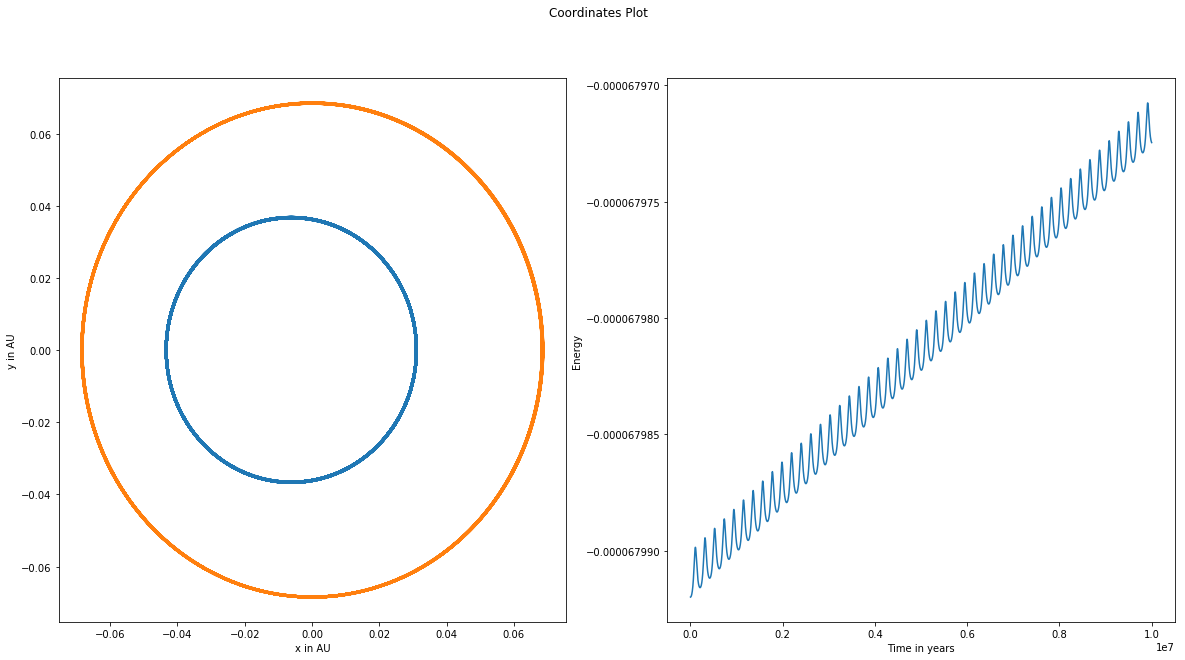

In [24]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

for i in range(len(planet_masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t_h, e_h)

plt.show()

## Saving data to a file, and reading it back in!
We'll also want to save our models and then be able to read them back in so you don't have to keep running models once you find one you like.

Per usual, we'll use a function from a library!

In [25]:
from hermite_library import save_hermite_solution_to_file

Now we'll simply call this and save our data!

In [26]:
# you can save it to your local directory, or another place
save_hermite_solution_to_file('myPlanetSystem.txt', 
                              t_h, e_h, r_h, v_h)